In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings 
%matplotlib inline

In [152]:
data = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv',index_col = 'PassengerId')

In [153]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [154]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [155]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [156]:
data.shape

(891, 11)

In [157]:
##null variables are in Age, Cabin, Embarked columns
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [158]:
#missing percentages
[(feature, 'column has ', round(data[feature].isnull().mean()*100, 3), '% missing values') for feature in df.columns if data[feature].isnull().sum()>0]

[('Age', 'column has ', 19.865, '% missing values'),
 ('Cabin', 'column has ', 77.104, '% missing values'),
 ('Embarked', 'column has ', 0.224, '% missing values')]

<AxesSubplot:>

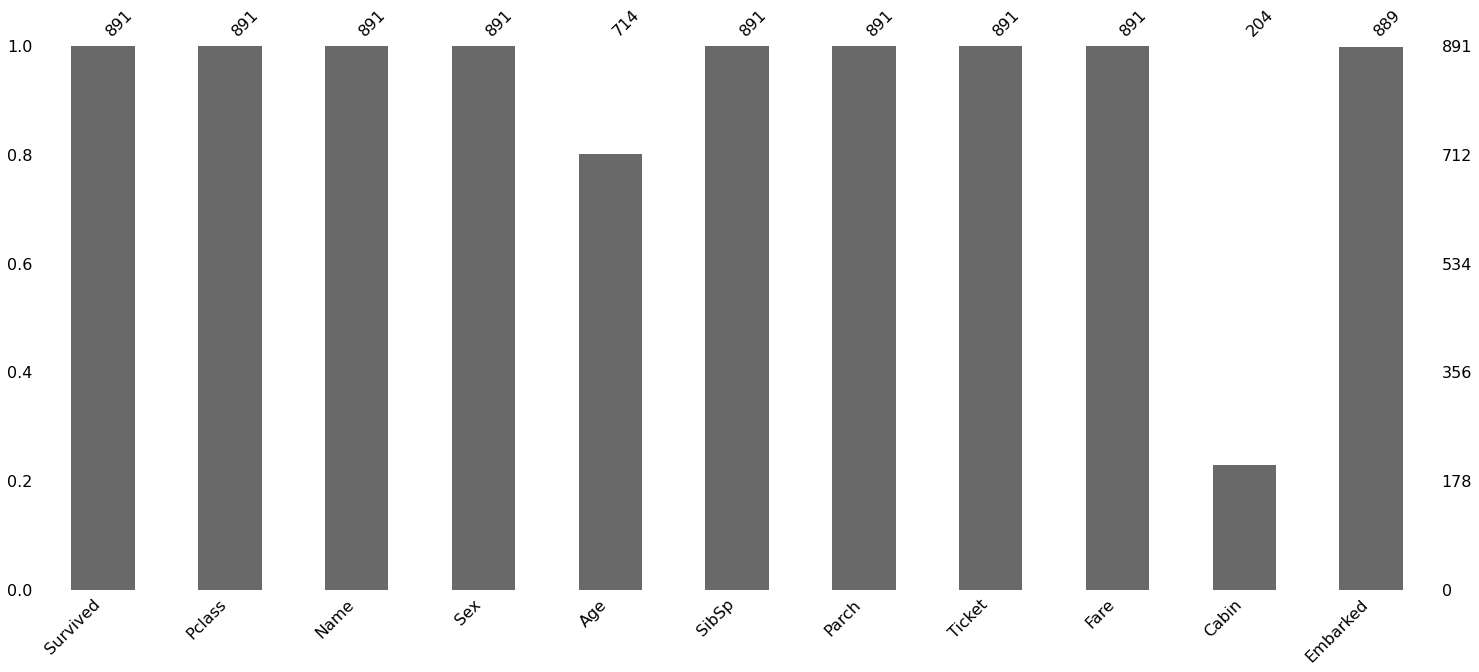

In [159]:
msno.bar(data)


<AxesSubplot:>

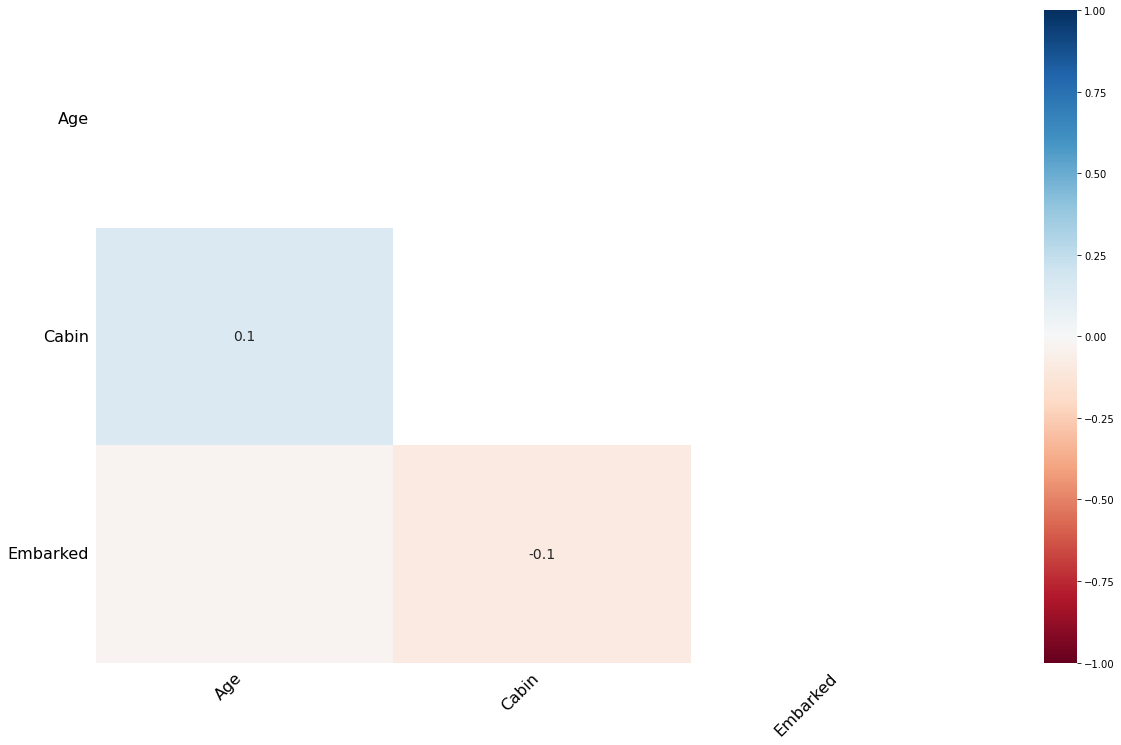

In [160]:
msno.heatmap(df)

In [161]:
#unique values
df = data.copy()
[(feature, 'feature has', len(data[feature].unique()), 'unique variables') for feature in df.columns ]

[('Survived', 'feature has', 2, 'unique variables'),
 ('Pclass', 'feature has', 3, 'unique variables'),
 ('Name', 'feature has', 891, 'unique variables'),
 ('Sex', 'feature has', 2, 'unique variables'),
 ('Age', 'feature has', 89, 'unique variables'),
 ('SibSp', 'feature has', 7, 'unique variables'),
 ('Parch', 'feature has', 7, 'unique variables'),
 ('Ticket', 'feature has', 681, 'unique variables'),
 ('Fare', 'feature has', 248, 'unique variables'),
 ('Cabin', 'feature has', 148, 'unique variables'),
 ('Embarked', 'feature has', 4, 'unique variables')]

In [162]:
#categorical_variables

[feature for feature in data.columns if len(data[feature].unique())<8]

['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

In [163]:
categorical_feat = [feature for feature in data.columns if len(data[feature].unique())<8]

In [164]:
#Encoding the categories
data['Sex'] = data['Sex'].map({'female':0, 'male':1})
data['Embarked'] = data['Embarked'].map({'S':0, 'C':1,'Q':2})


In [165]:
print(data['Parch'].unique())
print(data['Embarked'].unique())


[0 1 2 5 3 4 6]
[ 0.  1.  2. nan]


In [166]:
#continuous features
set(data.columns)- set(categorical_feat)


{'Age', 'Cabin', 'Fare', 'Name', 'Ticket'}

In [167]:
candiadate_continuous_feat = set(data.columns)- set(categorical_feat)

In [168]:
data[continuous_feat].head()

,Ticket,Name,Fare,Age,Cabin
PassengerId,,,,,
1,A/5 21171,"Braund, Mr. Owen Harris",7.2500,22.0,NaN
2,PC 17599,"Cumings, Mrs. John Bradley (Florence Briggs Th...",71.2833,38.0,C85
3,STON/O2. 3101282,"Heikkinen, Miss. Laina",7.9250,26.0,NaN
4,113803,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",53.1000,35.0,C123
5,373450,"Allen, Mr. William Henry",8.0500,35.0,NaN


In [169]:
data[continuous_feat].dtypes

Ticket     object
Name       object
Fare      float64
Age       float64
Cabin      object
dtype: object

In [170]:
#Check if there are duplicated rows
data.duplicated().sum()

0

array([[<AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>,
        <AxesSubplot:title={'center':'Sex'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>,
        <AxesSubplot:title={'center':'Embarked'}>, <AxesSubplot:>]],
      dtype=object)

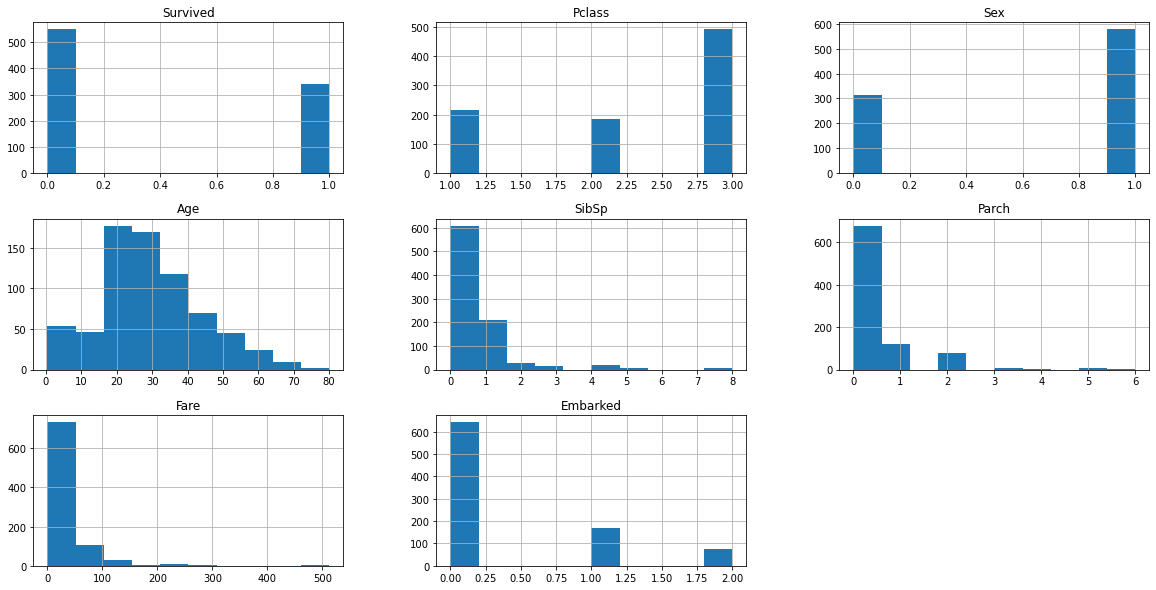

In [171]:
data.hist(figsize = (20,10))

In [172]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    int64  
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    float64
dtypes: float64(3), int64(5), object(3)
memory usage: 83.5+ KB


In [173]:
#unique values

df = data.copy()
[(feature, 'feature has', len(data[feature].unique()), 'unique variables') for feature in df.columns ]

[('Survived', 'feature has', 2, 'unique variables'),
 ('Pclass', 'feature has', 3, 'unique variables'),
 ('Name', 'feature has', 891, 'unique variables'),
 ('Sex', 'feature has', 2, 'unique variables'),
 ('Age', 'feature has', 89, 'unique variables'),
 ('SibSp', 'feature has', 7, 'unique variables'),
 ('Parch', 'feature has', 7, 'unique variables'),
 ('Ticket', 'feature has', 681, 'unique variables'),
 ('Fare', 'feature has', 248, 'unique variables'),
 ('Cabin', 'feature has', 148, 'unique variables'),
 ('Embarked', 'feature has', 4, 'unique variables')]

In [174]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1.0
3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0.0
5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0.0


In [175]:
data.Embarked.unique()

array([ 0.,  1.,  2., nan])

<AxesSubplot:>

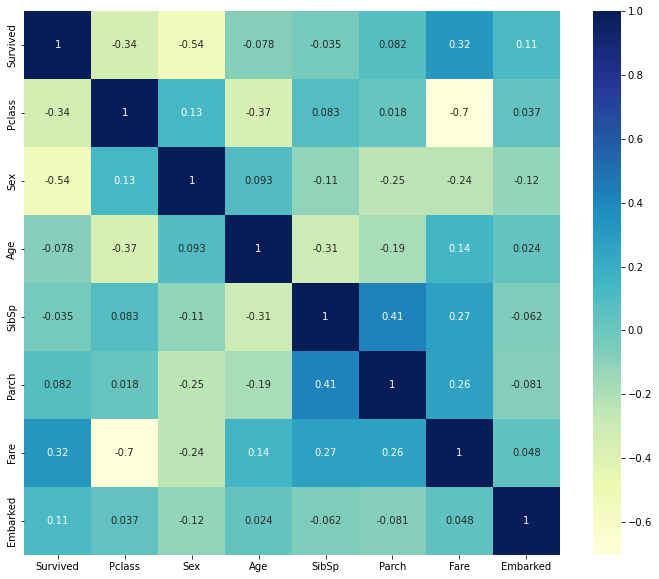

In [188]:
df = data.copy()
plt.figure(figsize= (12,10))
sns.heatmap(df.corr(), annot = True, cmap = 'YlGnBu')

In [177]:
##data with missiing variables
missing_features = [feature for feature in df.columns if data[feature].isnull().sum()>0]

In [178]:
#fill the missing variables by Knn supervised method
#First drop the unnecessary column at first hand like name
data.drop('Name', axis = 1, inplace = True)

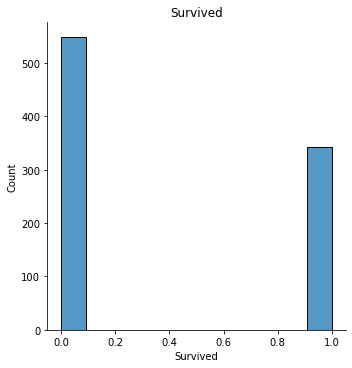

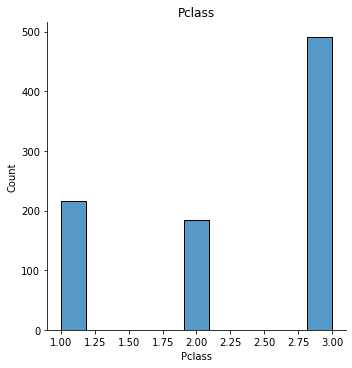

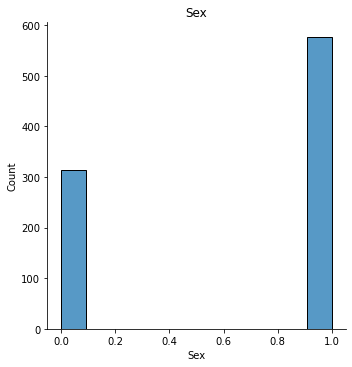

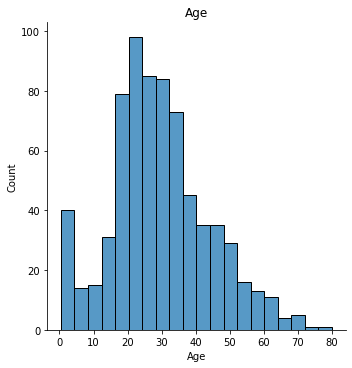

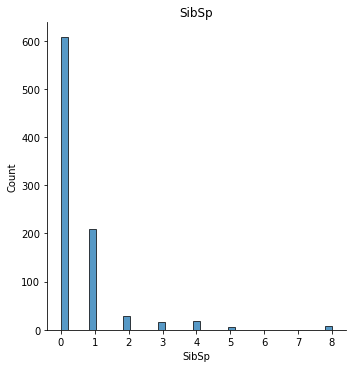

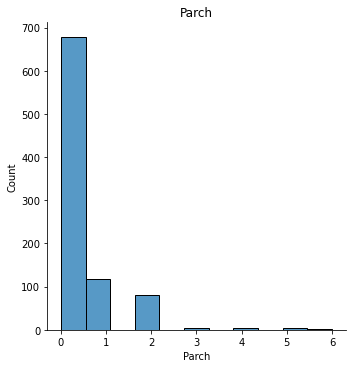

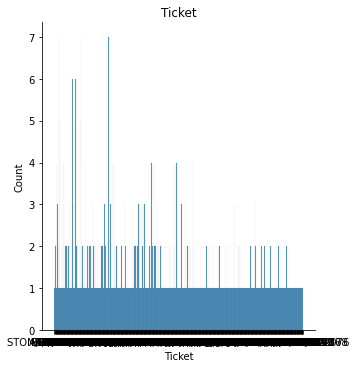

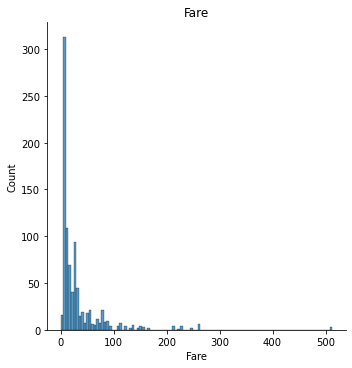

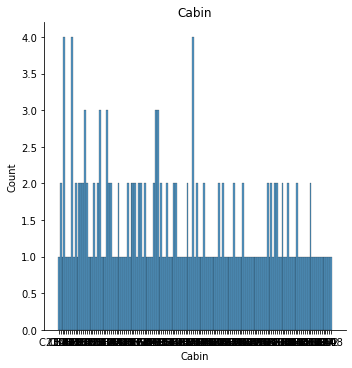

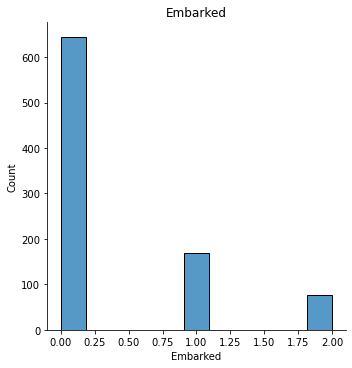

In [179]:
#Detect outlier
for feature in data.columns:
    sns.displot(data[feature])
    plt.title(feature)
    plt.show()

In [129]:
#Interquartile boundries:
print(data.Fare.quantile(0.75)-data.Fare.quantile(0.25))
IQR = data.Fare.quantile(0.75)-data.Fare.quantile(0.25)
print(df.Fare.quantile(0.25)-1.5*IQR)
print(df.Fare.quantile(0.75)+1.5*IQR)
lower_bound = df.Fare.quantile(0.25)-1.5*IQR
upper_bound = df.Fare.quantile(0.75)+1.5*IQR


23.0896
-26.724
65.6344


In [131]:
#Extreme values repalaced with upper boundry
data[data['Fare']>upper_bound]

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
2,1,1,0,38.0,1,0,PC 17599,71.2833,C85,1.0
28,0,1,1,19.0,3,2,19950,263.0000,C23 C25 C27,0.0
32,1,1,0,NaN,1,0,PC 17569,146.5208,B78,1.0
35,0,1,1,28.0,1,0,PC 17604,82.1708,NaN,1.0
53,1,1,0,49.0,1,0,PC 17572,76.7292,D33,1.0
...,...,...,...,...,...,...,...,...,...,...
847,0,3,1,NaN,8,2,CA. 2343,69.5500,NaN,0.0
850,1,1,0,NaN,1,0,17453,89.1042,C92,1.0
857,1,1,0,45.0,1,1,36928,164.8667,NaN,0.0


In [133]:
upper_bound2 = upper_bound = df.Fare.quantile(0.75)+3*IQR
print(upper_bound2)
print(data[data['Fare']>upper_bound2].shape)

100.2688

In [180]:
# There is more sensible number of outliers when it is compared to total # of rows
# Hence extreme values are assigned to upper boundries with 3 times interquantiles plus 0.75 quantiles 
data.loc[data['Fare']>upper_bound2, 'Fare'] = 100
data[data['Fare']>upper_bound2].shape


(0, 10)

C:\Users\43117073062\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

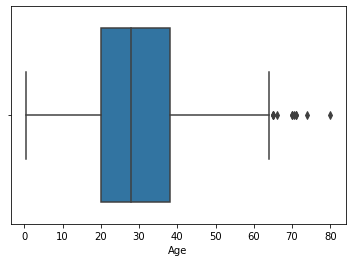

In [181]:
sns.boxplot(data.Age)

In [182]:
print(data['Age'].quantile(0.75)-data['Age'].quantile(0.25))
IQR = data['Age'].quantile(0.75)-data['Age'].quantile(0.25)
print(data['Age'].quantile(0.75) + 1.5*IQR)
print(data['Age'].quantile(0.75) + 3*IQR)
print(data[data['Age']>73].shape)
data.loc[data['Age']>73, 'Age'] = 73

17.875
64.8125
91.625
(2, 10)


,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
631,1,1,1,73.0,0,0,27042,30.000,A23,0.0
852,0,3,1,73.0,0,0,347060,7.775,NaN,0.0


In [184]:
outliers=[]
def detect_outliers(data):
    
    threshold=3
    mean = np.mean(data)
    std =np.std(data)
       
    for i in data:
        z_score= (i - mean)/std 
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

detect_outliers(data['Age'])
detect_outliers(data['Fare'])

[]

In [185]:
# Using Forward Filling method
print('Null values in column Embarked forward fill =',data['Embarked'].isnull().sum())
data.loc[:,'Embarked'] = data.loc[:,'Embarked'].ffill()

Null values in column Embarked forward fill = 2


In [346]:
from sklearn.linear_model import LinearRegression
df1=data.dropna()
df = data.copy()
X=df1.loc[:,('Survived','Fare')]
y=df1.loc[:,'Age']
model=LinearRegression()
model.fit(X,y)
df_null=data[df['Age'].isnull()]
X_null=df_null.loc[:,('Survived','Fare')]
predict=model.predict(X_null)
df.loc[df['Age'].isnull(), 'Age']= np.round(predict)

In [357]:


df11 = df.copy()
df2=df.dropna()

replaced_val = df2[df['Cabin'].notnull()]['Cabin']
unique_val = np.arange(len(df2[df2['Cabin'].notnull()]['Cabin']))
df2[df2['Cabin'].notnull()]['Cabin'].replace(to_replace = replaced_val, value = unique_val )

X=df2.drop('Cabin', axis = True)
y=df2.loc[:,'Cabin']

from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
After_imputation = imputer.fit_transform(df2[['Cabin']])
After_imputation

'''df_null=data[df['Age'].isnull()]
X_null=df_null.loc[:,('Survived','Fare')]
predict=model.predict(X_null)
df.loc[df['Age'].isnull(), 'Age']= np.round(predict)
#df['Cabin'].factorize()[0]
#v_unique = np.arange(len(l_unique)) # obtaining values in the range of the length of I_unique
#v_unique
#data['game_season'].replace(to_replace=l_unique, value=v_unique, inplace=True) # replacing categorical data with numerical values
#data['game_season'].head()'''





C:\Users\431170~1\AppData\Local\Temp/ipykernel_49504/2372790551.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  replaced_val = df2[df['Cabin'].notnull()]['Cabin']


TypeError: value argument must be scalar, dict, or Series

In [323]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
After_imputation = imputer.fit_transform(df[['Cabin']])

ValueError: could not convert string to float: 'C85'

In [332]:
np.random.randn()

AttributeError: module 'numpy' has no attribute 'range'

In [345]:
df[df['Cabin'].notnull()]['Cabin']

PassengerId
2              C85
4             C123
7              E46
11              G6
12            C103
          ...     
872            D35
873    B51 B53 B55
880            C50
888            B42
890           C148
Name: Cabin, Length: 204, dtype: object